<a href="https://colab.research.google.com/github/sametaydn/HeartFailure/blob/main/HeartFailureClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, I am importing; pandas to read our data and manipulation. NumPy performs mathematical, algebraic and statistical operations on indexes. seaborn and matplotlib for visualizations. sklearn for algorithms.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib 
matplotlib.style.use('ggplot')
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
heartDF = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/heart.csv')

In [4]:
heartDF['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [5]:
numerical= heartDF.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = heartDF.select_dtypes('object').columns

In [6]:
categorical_feature = [i for i in heartDF.columns if heartDF[i].nunique() < 10]
numeric_feature = [i for i in heartDF.columns if heartDF[i].nunique() > 10]
print(f'discrette feature: {categorical_feature }')
print(f'continuous feature: {numeric_feature}')

discrette feature: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
continuous feature: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


Let's try to find the correlation of every pair of features and visualize them. Brighter colours have more correlation.

                   Age  RestingBP  ...   Oldpeak  HeartDisease
Age           1.000000   0.254399  ...  0.258612      0.282039
RestingBP     0.254399   1.000000  ...  0.164803      0.107589
Cholesterol  -0.095282   0.100893  ...  0.050148     -0.232741
FastingBS     0.198039   0.070193  ...  0.052698      0.267291
MaxHR        -0.382045  -0.112135  ... -0.160691     -0.400421
Oldpeak       0.258612   0.164803  ...  1.000000      0.403951
HeartDisease  0.282039   0.107589  ...  0.403951      1.000000

[7 rows x 7 columns]


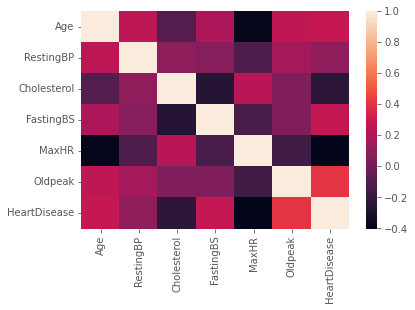

In [7]:
corr = heartDF.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [8]:
heartDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In this part, I would like to see distributions of data. That's a good way to check the linearity of features and look for their skewness of them. I will use the KDE tool here because it is quite useful.

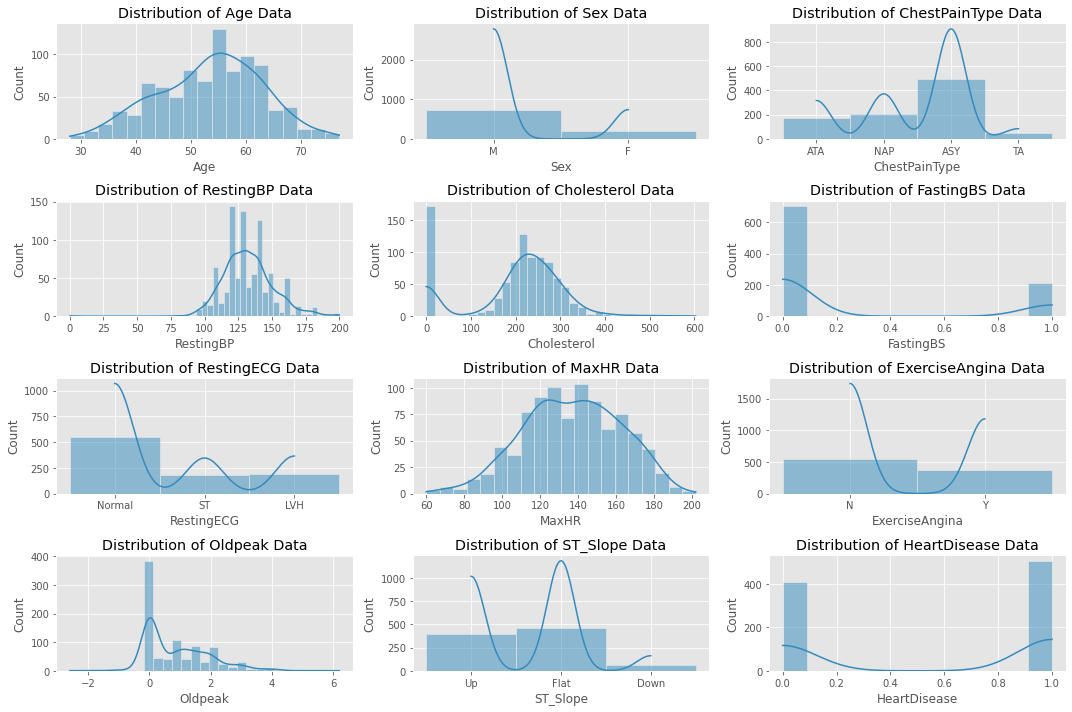

In [9]:
plt.figure(figsize=(15,10))

for i, col in enumerate(heartDF.columns,1):
      plt.subplot(4,3,i)
      plt.title(f"Distribution of {col} Data")
      sns.histplot(heartDF[col],kde=True)
      plt.tight_layout()
      plt.plot()
 

**Data Preparing for model**

In [10]:
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import datasets

In [11]:
X = heartDF.drop(columns=['HeartDisease'])
y = heartDF['HeartDisease']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=25)
print('Shape of x and y for Train :', X_train.shape, y_train.shape)
print('Shape of x and y for Test :', X_test.shape, y_test.shape)

Shape of x and y for Train : (688, 11) (688,)
Shape of x and y for Test : (230, 11) (230,)


We need to use a one-hot encoder here because some of our features are categorical, some of them are integer.

In [14]:
transformation = ColumnTransformer(transformers = [('onehot', OneHotEncoder(sparse=False, drop='first'), [1,2,6,8,10]),
                                                ('scaler', StandardScaler(), [0,3,4,5,7,9])],
                                      remainder = 'passthrough')
X_train = transformation.fit_transform(X_train)
X_test = transformation.transform(X_test)

**Building a model**

In [15]:
def make_predict(classify):
    
    # training the classifier
    classify.fit(X_train, y_train)
    
    #making prediction and evaluating
    prediction = classify.predict(X_test)
    cross_validation_score = cross_val(X_train,y_train, classify)
    accuracy = accuracy_score(y_test, prediction)
    con_metrix = confusion_matrix(y_test, prediction)
    
    return accuracy,con_metrix, cross_validation_score

def cross_val(X_train, y_train, classify):
    
    # using k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classify, X = X_train, y = y_train, cv=10, n_jobs=1)
    return accuracies.mean()

Instead of repeating the model in algorithms, I used it as a function, so it became more organized and more understandable.

**1. Logistic Regression**

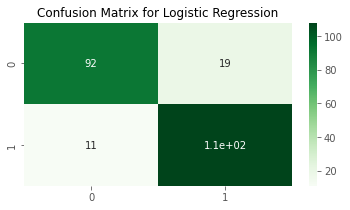

Logistic Regression Accuracy score on the training data is 86.77
Logistic Regression Accuracy score on the test data is 86.96


In [16]:
logistic_reg = LogisticRegression(solver='liblinear',random_state=0)
accuracy,con_metrix, cross_validation_score =make_predict(logistic_reg)

plt.figure(figsize=(6,3))
sns.heatmap(con_metrix, annot=True, cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression',size=12)
plt.show()
print('Logistic Regression Accuracy score on the training data is {}'.format((cross_validation_score *100).round(2)))
print('Logistic Regression Accuracy score on the test data is {}'.format((accuracy *100).round(2)))

**2. Support Vector Machine**

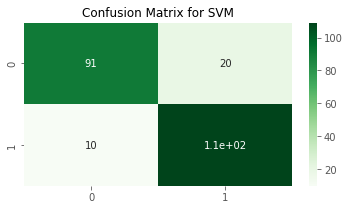

SVM Accuracy score on the training data is 86.2
SVM Accuracy score on the test data is 86.96


In [17]:
smo = SVC(decision_function_shape='ovo')
accuracy,con_metrix, cross_validation_score = make_predict(smo)

plt.figure(figsize=(6,3))
sns.heatmap(con_metrix, annot=True, cmap='Greens')
plt.title('Confusion Matrix for SVM',size=12)
plt.show()
print('SVM Accuracy score on the training data is {}'.format((cross_validation_score *100).round(2)))
print('SVM Accuracy score on the test data is {}'.format((accuracy *100).round(2)))

**3. Random Forest**

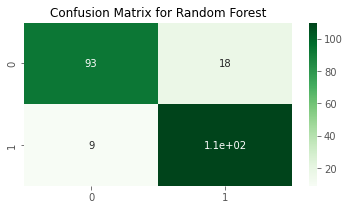

Random Forest  Accuracy score on the training data is 87.21
Random Forest score on the test data is 88.26


In [18]:
rf =RandomForestClassifier(n_estimators=2000,max_depth=100, random_state=1)
accuracy,con_metrix, cross_validation_score = make_predict(rf)

plt.figure(figsize=(6,3))
sns.heatmap(con_metrix, annot=True, cmap='Greens')
plt.title('Confusion Matrix for Random Forest',size=12)
plt.show()
print('Random Forest  Accuracy score on the training data is {}'.format((cross_validation_score *100).round(2)))
print('Random Forest score on the test data is {}'.format((accuracy *100).round(2)))

In the Classifier part, I tried many different parameters to increase accuracy.

Comparing:

Random Forest(%87.21)>Logistic Regression(86.77%)>Support Vector Machine(86.2%)